In [21]:
import sys 
sys.path.append('..')
from projet_etu import *
import numpy as np 
import matplotlib as plt 
from mltools import *
from utils import *
import pickle as pkl
from loss import *
from activation import *
from sklearn.datasets import load_digits
import pandas as pd


In [22]:
X_train = pd.read_csv("../data/fashion-mnist_train.csv")
X_test = pd.read_csv("../data/fashion-mnist_test.csv")
X_train = X_train.values
X_test = X_test.values


In [23]:
X_train.shape

(60000, 785)

In [24]:
# normalize data
Y_train = X_train[:,0]
Y_test = X_test[:,0]
X_train = X_train[:,1:] / 256
X_test = X_test[:,1:] / 256





X_train[:, 1:].shape
X_train.max()

0.99609375

In [25]:
np.unique(Y_test)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

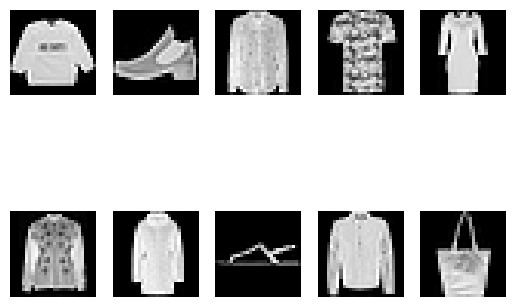

In [26]:
# affichage des images
plt.figure()
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.axis('off')
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
plt.show()
    


In [27]:
linear1 = Linear(784, 128)
tanh = TanH()
softmax = Softmax()
sigmoid = Sigmoid()
linear2 = Linear(128, 10)
bce_loss = BCELoss()

loss_list= []
encoder = [linear1, tanh, linear2,tanh]
decoder = [Linear(10, 128), tanh, Linear(128, 784), sigmoid]
net = Sequential(encoder+decoder)


In [28]:
Lerror , _ , loss_train , _= SGD(net, bce_loss,X_train, X_train, eps = 0.001 , batch_size = 32, max_iter=30)

Epoch: 0 / 30
Loss train   0.402
Loss test 0.403
Epoch: 1 / 30
Loss train   0.373
Loss test 0.375
Epoch: 2 / 30
Loss train   0.358
Loss test 0.359
Epoch: 3 / 30
Loss train   0.349
Loss test 0.351
Epoch: 4 / 30
Loss train   0.343
Loss test 0.345
Epoch: 5 / 30
Loss train   0.335
Loss test 0.337
Epoch: 6 / 30
Loss train   0.333
Loss test 0.335
Epoch: 7 / 30
Loss train   0.33
Loss test 0.332
Epoch: 8 / 30
Loss train   0.326
Loss test 0.328
Epoch: 9 / 30
Loss train   0.322
Loss test 0.324
Epoch: 10 / 30
Loss train   0.321
Loss test 0.323
Epoch: 11 / 30
Loss train   0.321
Loss test 0.323
Epoch: 12 / 30
Loss train   0.325
Loss test 0.328
Epoch: 13 / 30
Loss train   0.319
Loss test 0.321
Epoch: 14 / 30
Loss train   0.316
Loss test 0.318
Epoch: 15 / 30
Loss train   0.315
Loss test 0.317
Epoch: 16 / 30
Loss train   0.314
Loss test 0.316
Epoch: 17 / 30
Loss train   0.316
Loss test 0.318
Epoch: 18 / 30
Loss train   0.314
Loss test 0.316
Epoch: 19 / 30
Loss train   0.313
Loss test 0.315
Epoch: 20 /

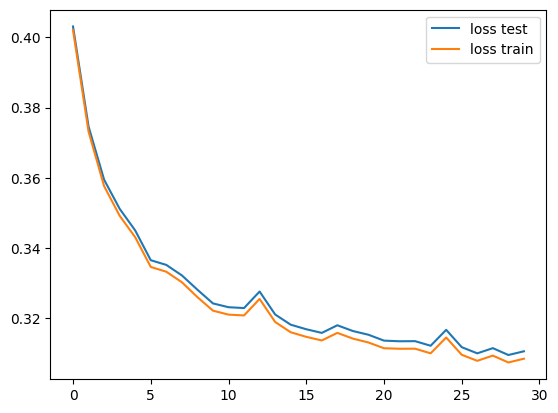

In [29]:
plt.plot(Lerror,label ='loss test')
plt.plot(loss_train, label='loss train')
plt.legend()
plt.show()

In [154]:
one  = np.ones((X_train[0].shape[0],1))


X_train[0].shape
# put it vertically 
X_train[0].reshape(1,784).shape

(1, 784)

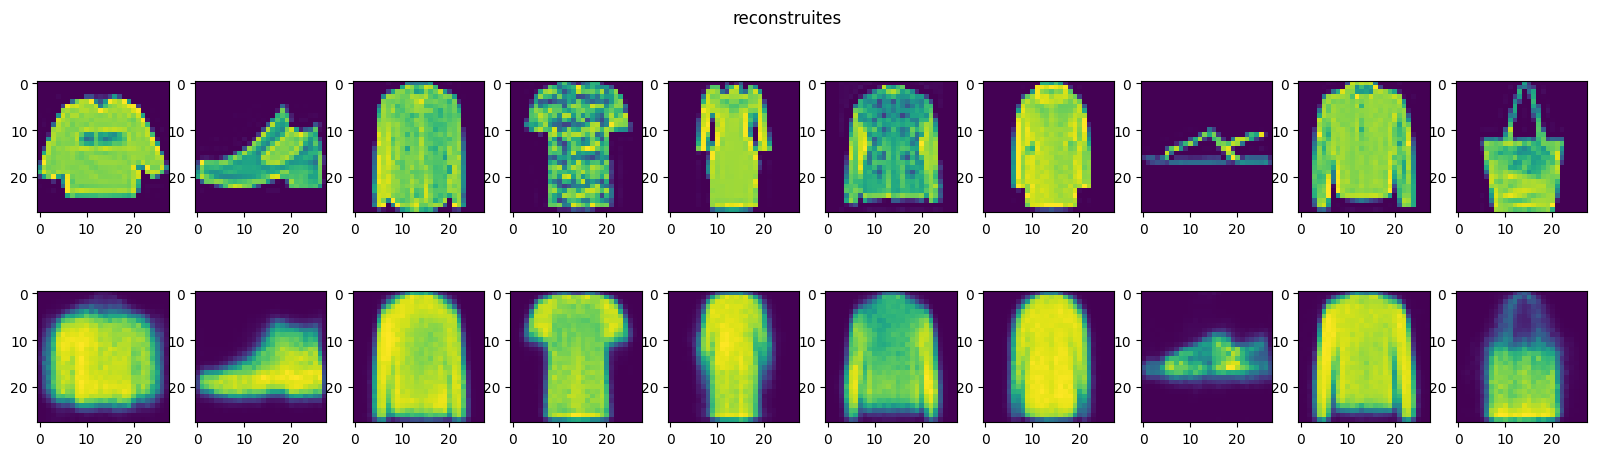

In [30]:
# affichage  des images  qui compare les images reconstruites sur chaque label 
plt.figure(figsize=(20,5))
plt.suptitle("reconstruites")
for i in range(10):
    plt.subplot(2,10,i+1)
    plt.imshow(X_train[i].reshape(28,28))
    
    plt.subplot(2,10,i+11)
    
    plt.imshow(net.forward(X_train[i].reshape(1,784)).reshape(28,28))

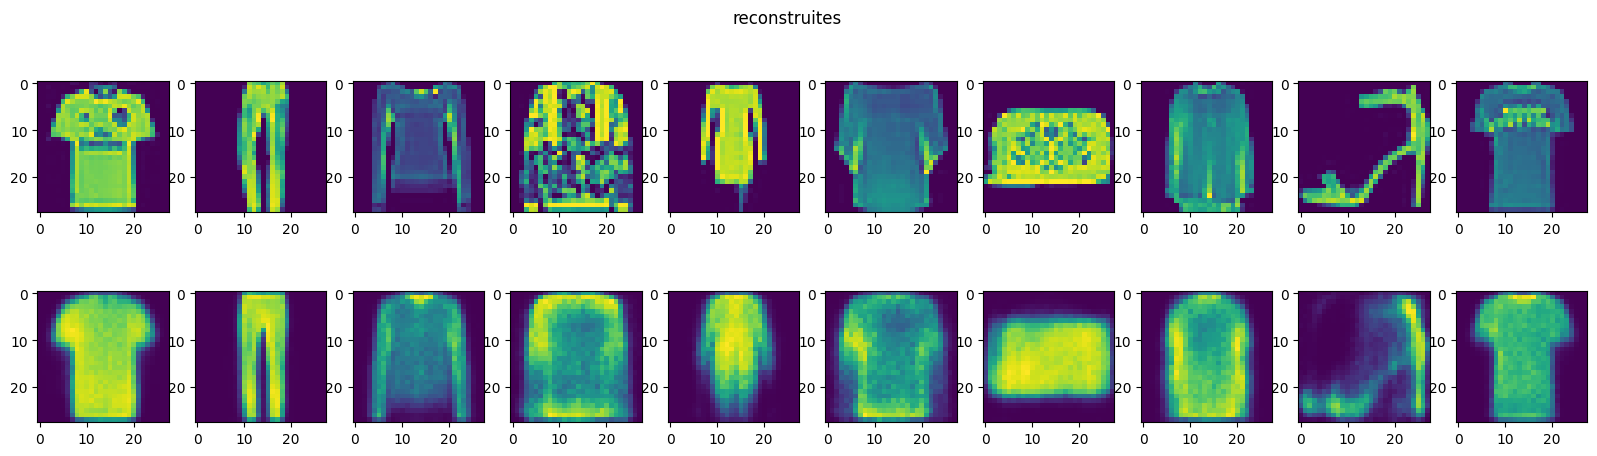

In [31]:
plt.figure(figsize=(20,5))
plt.suptitle("reconstruites")
for i in range(10):
    plt.subplot(2,10,i+1)
    plt.imshow(X_test[i].reshape(28,28))
    
    plt.subplot(2,10,i+11)
    
    plt.imshow(net.forward(X_test[i].reshape(1,784)).reshape(28,28))

## test d'effet de pas de gradient

In [30]:
networks = []
for i in range(6):
    linear1 = Linear(784, 128)
    tanh = TanH()
    softmax = Softmax()
    sigmoid = Sigmoid()
    linear2 = Linear(128, 10)
    bce_loss = BCELoss()

    loss_list= []
    encoder = [linear1, tanh, linear2,tanh]
    decoder = [Linear(10, 128), tanh, Linear(128, 784), sigmoid]
    net = Sequential(encoder+decoder)
    networks.append(net)

print(len(networks))
      

6


In [32]:
l_eps = [1e-10, 1e-5, 1e-3 , 1e-2, 0.1, 1.0]

all_error_test=[]
all_error_train =[]


for i, e in enumerate(l_eps):

    print(f"pour le reseau{i+1} on  utilise un pas de gradient  de {e}")
    print("=============================== \n\n")
    Lerror , Lscore, Lerror_train, Lscore_train = SGD(networks[i], bce_loss,X_train, X_train, eps = e  , batch_size = 32, max_iter=10)
    all_error_test.append(Lerror)
    all_error_train.append(Lerror_train)
    print("=============================== \n\n")
    
        


pour le reseau1 on n'utilise un pas de gradient  de 1e-10


Epoch: 0 / 10
Loss train   0.72
Loss test 0.72
Epoch: 1 / 10
Loss train   0.72
Loss test 0.72
Epoch: 2 / 10
Loss train   0.72
Loss test 0.72
Epoch: 3 / 10
Loss train   0.72
Loss test 0.72
Epoch: 4 / 10
Loss train   0.72
Loss test 0.72
Epoch: 5 / 10
Loss train   0.72
Loss test 0.72
Epoch: 6 / 10
Loss train   0.72
Loss test 0.72
Epoch: 7 / 10
Loss train   0.72
Loss test 0.72
Epoch: 8 / 10
Loss train   0.72
Loss test 0.72
Epoch: 9 / 10
Loss train   0.72
Loss test 0.72


pour le reseau2 on n'utilise un pas de gradient  de 1e-05


Epoch: 0 / 10
Loss train   0.683
Loss test 0.683
Epoch: 1 / 10
Loss train   0.659
Loss test 0.659
Epoch: 2 / 10
Loss train   0.631
Loss test 0.632
Epoch: 3 / 10
Loss train   0.604
Loss test 0.604
Epoch: 4 / 10
Loss train   0.581
Loss test 0.581
Epoch: 5 / 10
Loss train   0.562
Loss test 0.562
Epoch: 6 / 10
Loss train   0.546
Loss test 0.547
Epoch: 7 / 10
Loss train   0.534
Loss test 0.535
Epoch: 8 / 10
Lo

In [ ]:
plt.figure(figsize = (1, 6))
for i , Lerror in all_error_test : 
    plt.subplot(1, i+1)
    plt.plot(Lerror,label =' loss_test')
    plt.plot(all_error_train[i],label =' loss_train'  )
    plt.legend()
    plt.show()

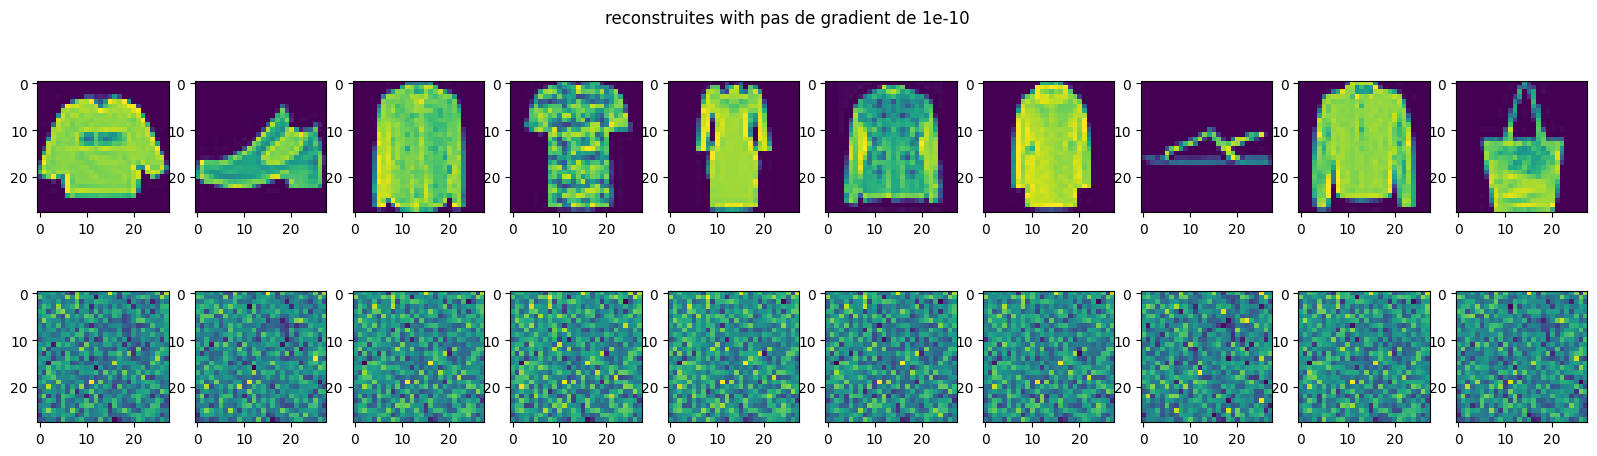

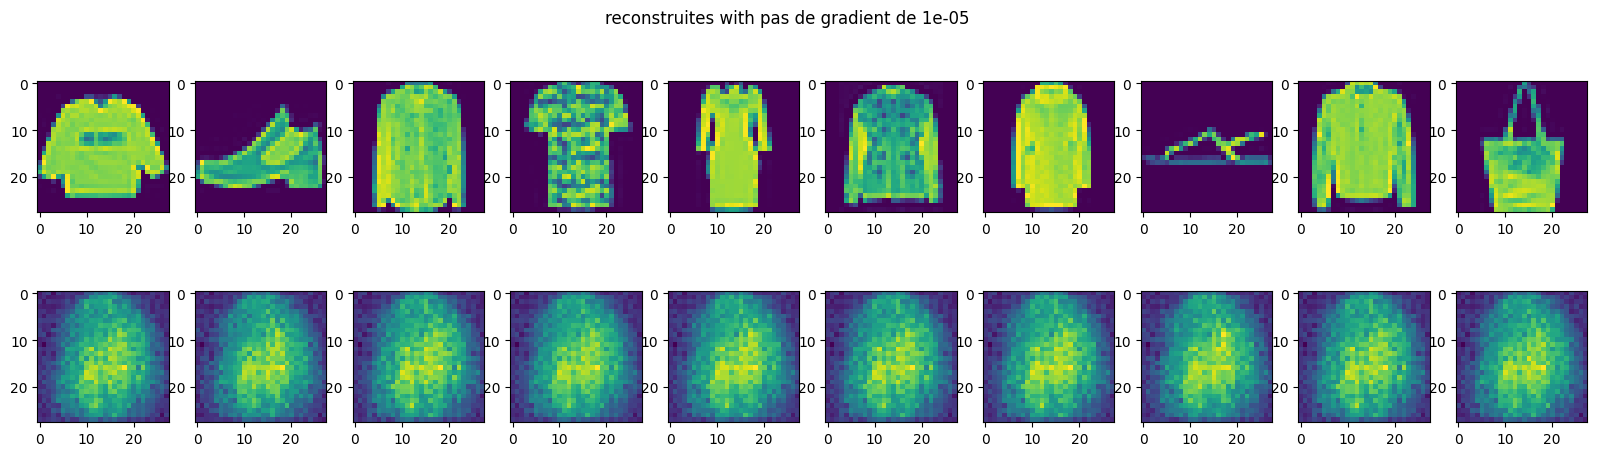

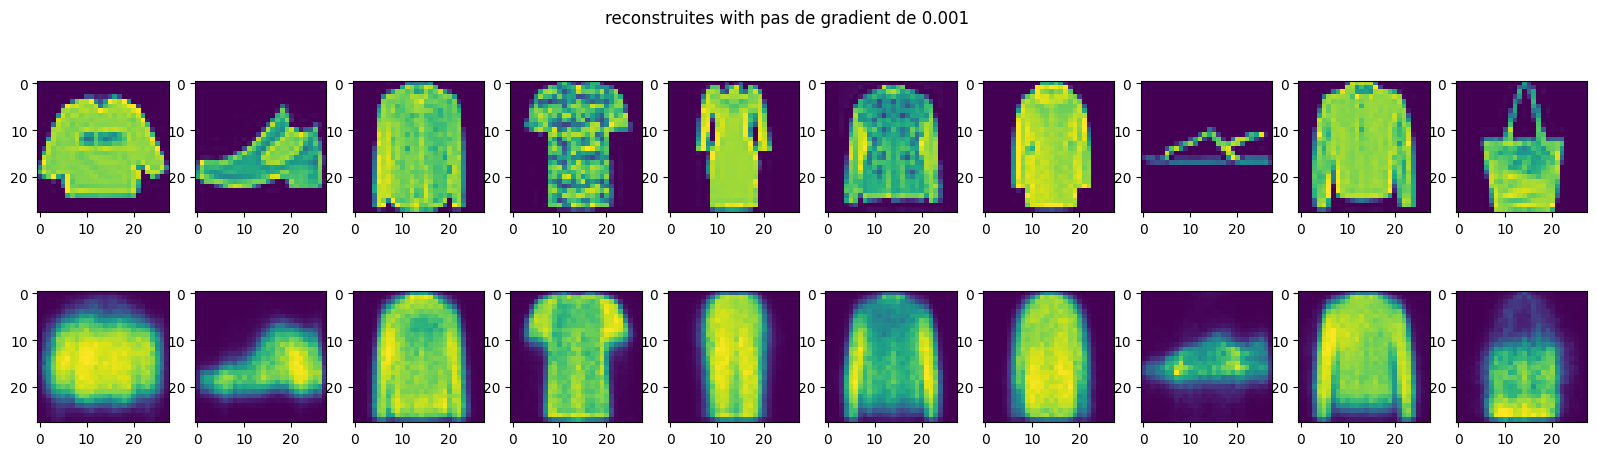

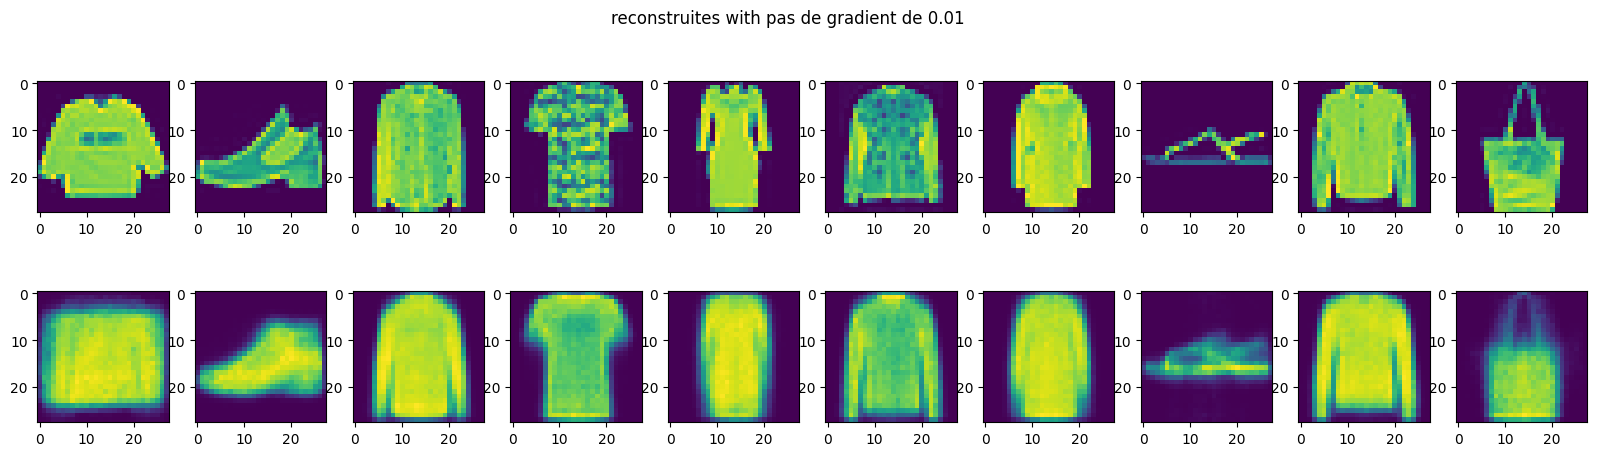

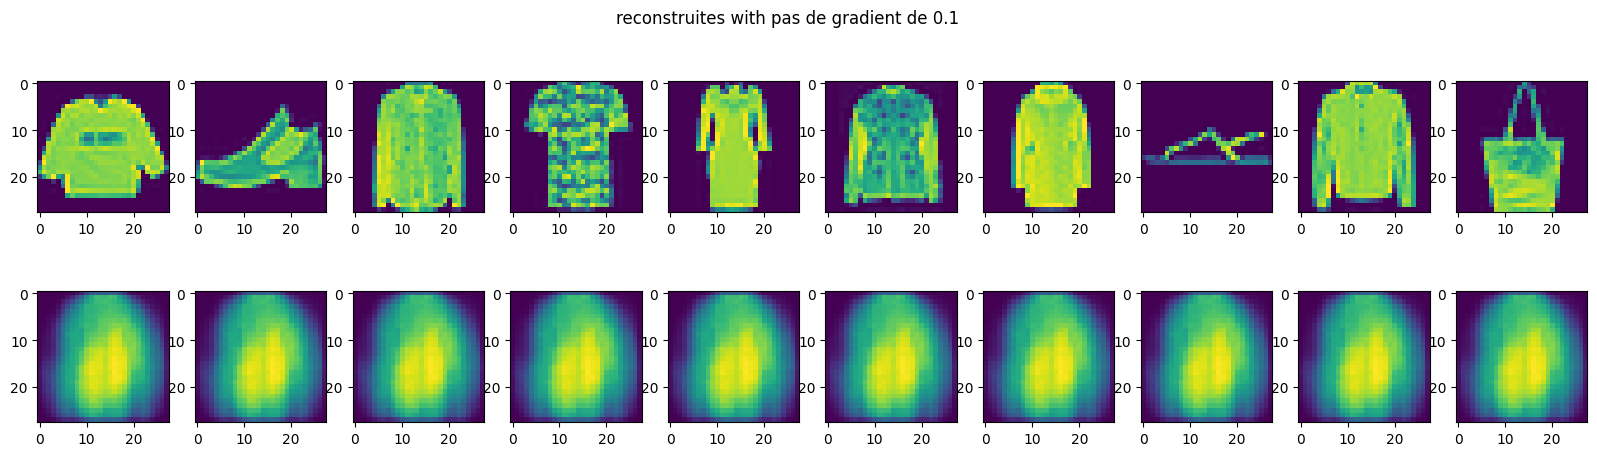

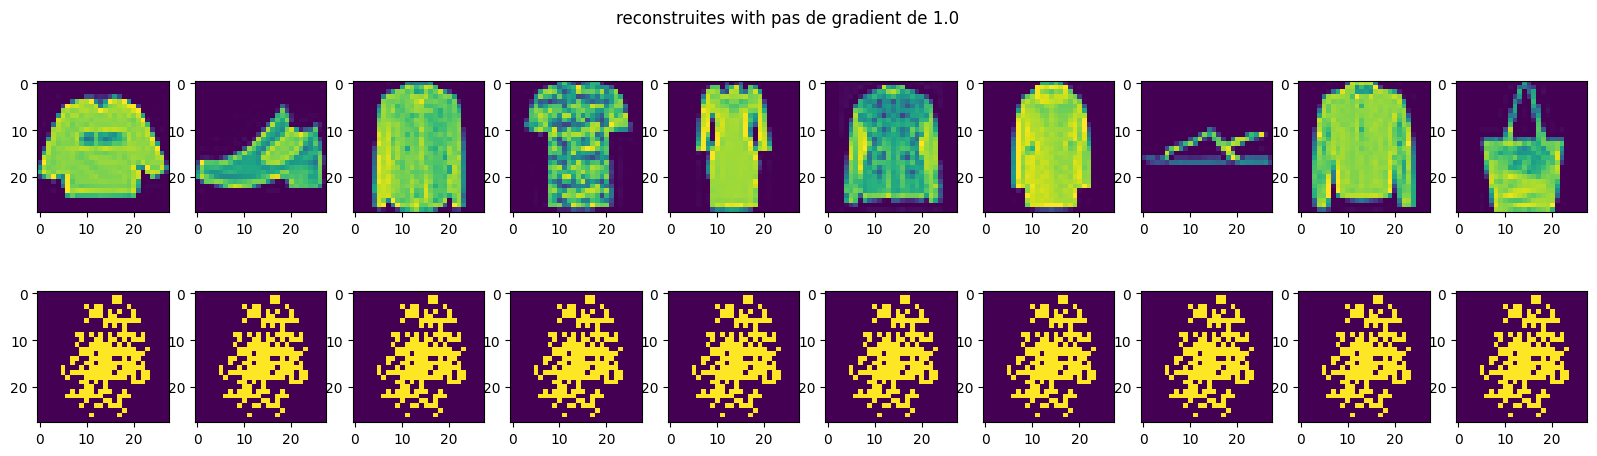

In [35]:
for i , net in enumerate(networks):
    plt.figure(figsize=(20,5))
    plt.suptitle(f"reconstruites with pas de gradient de {l_eps[i]}")
    for i in range(10):
        plt.subplot(2,10,i+1)
        plt.imshow(X_train[i].reshape(28,28))

        plt.subplot(2,10,i+11)

        plt.imshow(net.forward(X_train[i].reshape(1,784)).reshape(28,28))

un pas de gradient de 0.001 a la meilleur performance

### test avec un réseau plus profond  

In [15]:
bce_loss = BCELoss()

encoder = [Linear(784, 512), TanH(), Linear(512,256) , TanH(), Linear(256, 128),TanH(), Linear(128, 10),TanH()]
decoder = [Linear(10, 128), TanH(), Linear(128, 256),TanH(), Linear(256, 512) , TanH(), Linear(512, 784), Sigmoid()]
net = Sequential(encoder+decoder)


Lerror , _ , loss_train , _= SGD(net, bce_loss,X_train, X_train, eps = 0.001 , batch_size = 512, max_iter=50)


Epoch: 0 / 50
Loss train   0.485
Loss test 0.486
Epoch: 1 / 50
Loss train   0.437
Loss test 0.438
Epoch: 2 / 50
Loss train   0.408
Loss test 0.409
Epoch: 3 / 50
Loss train   0.394
Loss test 0.395
Epoch: 4 / 50
Loss train   0.386
Loss test 0.387
Epoch: 5 / 50
Loss train   0.381
Loss test 0.382
Epoch: 6 / 50
Loss train   0.373
Loss test 0.374
Epoch: 7 / 50
Loss train   0.367
Loss test 0.368
Epoch: 8 / 50
Loss train   0.362
Loss test 0.363
Epoch: 9 / 50
Loss train   0.357
Loss test 0.359
Epoch: 10 / 50
Loss train   0.352
Loss test 0.353
Epoch: 11 / 50
Loss train   0.351
Loss test 0.352
Epoch: 12 / 50
Loss train   0.347
Loss test 0.349
Epoch: 13 / 50
Loss train   0.344
Loss test 0.345
Epoch: 14 / 50
Loss train   0.343
Loss test 0.345
Epoch: 15 / 50
Loss train   0.34
Loss test 0.341
Epoch: 16 / 50
Loss train   0.337
Loss test 0.338
Epoch: 17 / 50
Loss train   0.335
Loss test 0.336
Epoch: 18 / 50
Loss train   0.335
Loss test 0.337
Epoch: 19 / 50
Loss train   0.332
Loss test 0.333
Epoch: 20 /

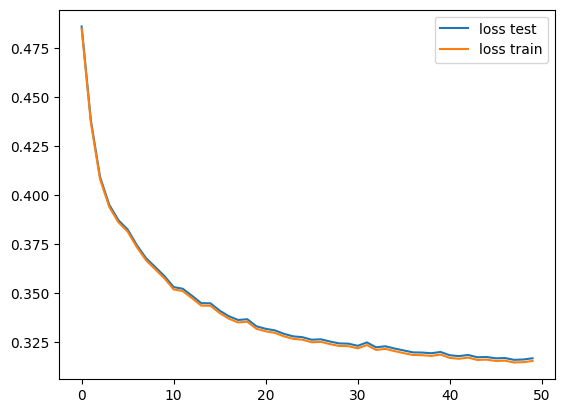

In [16]:
plt.plot(Lerror,label ='loss test')
plt.plot(loss_train, label='loss train')
plt.legend()
plt.show()

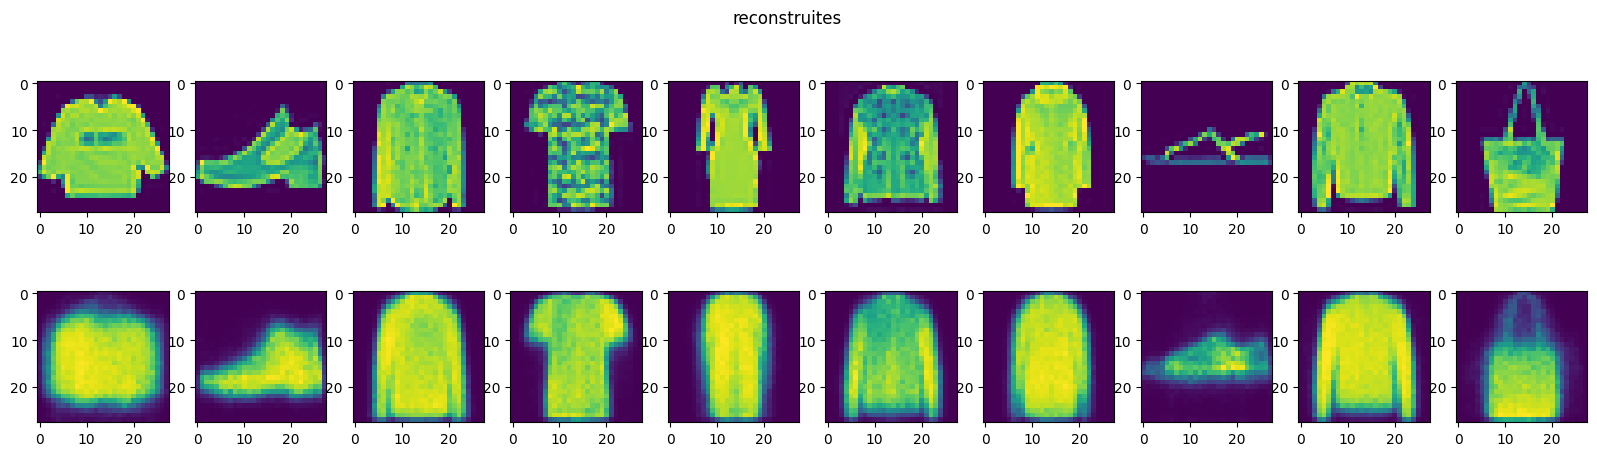

In [17]:
# affichage  des images  qui compare les images reconstruites sur chaque label 
plt.figure(figsize=(20,5))
plt.suptitle("reconstruites")
for i in range(10):
    plt.subplot(2,10,i+1)
    plt.imshow(X_train[i].reshape(28,28))
    
    plt.subplot(2,10,i+11)
    
    plt.imshow(net.forward(X_train[i].reshape(1,784)).reshape(28,28))

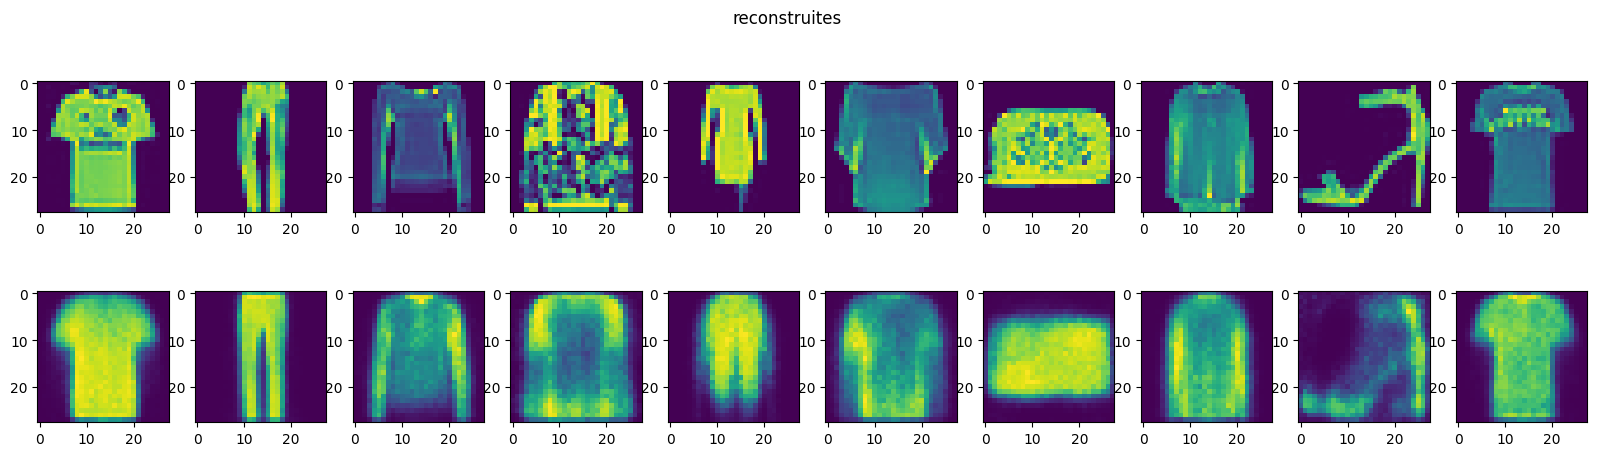

In [18]:
plt.figure(figsize=(20,5))
plt.suptitle("reconstruites")
for i in range(10):
    plt.subplot(2,10,i+1)
    plt.imshow(X_test[i].reshape(28,28))
    
    plt.subplot(2,10,i+11)
    
    plt.imshow(net.forward(X_test[i].reshape(1,784)).reshape(28,28))